In [7]:
# Importeren van de bibliotheken
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# Importeren/inlezen van de data (op later stadium de gemergde dataset inladen)
telemetry_df = pd.read_csv('data/PdM_telemetry.csv')
errors_df = pd.read_csv('data/PdM_errors.csv')
maint_df = pd.read_csv('data/PdM_maint.csv')
failures_df = pd.read_csv('data/PdM_failures.csv')
machines_df = pd.read_csv('data/PdM_machines.csv')

---

### Telemetrie
Deze dataset bevat informatie over telemetriegegevens, bestaande uit spannings-, rotatie-, druk- en trillingsmetingen die in real time, gemiddeld over elk uur, zijn verzameld over 100 machines gedurende het jaar 2015. In onderstaande code worden de eerste 10 records weergeven van de dataset evenals een smaenvatting van de gehele dataset.

In [9]:
# format datetime field which comes in as string
telemetry_df['datetime'] = pd.to_datetime(telemetry_df['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Totaal aantal telemetriegegevens: %d" % len(telemetry_df.index))
print(telemetry_df.head())
telemetry_df.describe()

Totaal aantal telemetriegegevens: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


Hieronder wordt, als voorbeeld, een grafiek weergeven van de spanningswaarden voor machineID 1, voor de eerste maand van 2015.

Text(0.5, 0, 'Datum')

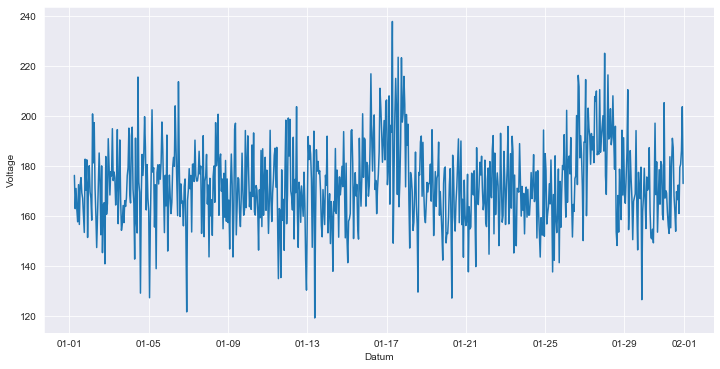

In [10]:
plot_df = telemetry_df.loc[(telemetry_df['machineID'] == 1) &
                        (telemetry_df['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry_df['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('Voltage')

# maak x-as ticks leesbaar
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Datum')

---

### Errors
De error gegevens bron omschrijft fouten (afkomstig uit een logboek). Dit zijn fouten die worden gemaakt terwijl de machine wel nog operationeel blijft; als een machine niet meer operationeel is wordt dit een failure genoemd. De datum en tijd van de fouten worden afgerond op het dichtstbijzijnde uur, aangezien de telemetriegegevens om het uur worden verzameld.

In [11]:
# Omzetten van datetime tabel (welke in string formaat aangeleverd wordt in de originele dataset)
errors_df['datetime'] = pd.to_datetime(errors_df['datetime'], format="%Y-%m-%d %H:%M:%S")
errors_df['errorID'] = errors_df['errorID'].astype('category')

print("Totaal aantal error-records: %d" % len(errors_df.index))
errors_df.head()

Totaal aantal error-records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


Text(0, 0.5, 'Count')

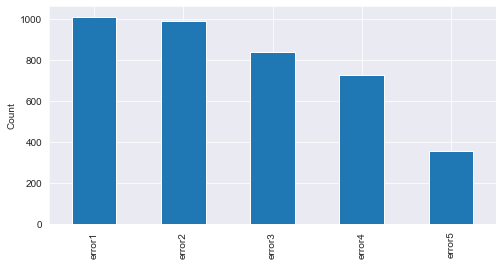

In [12]:
# Aantal errors afzetten tegen het type error
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
errors_df['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')

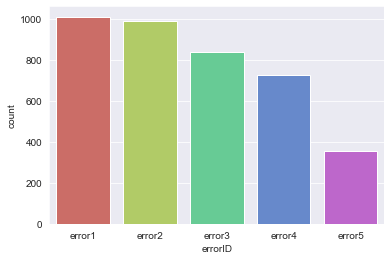

In [13]:
# Alternatieve code
sns.countplot(x= 'errorID', data=errors_df, palette='hls')
plt.show()

---

### Onderhoud
Dit zijn de registraties van gepland en niet-gepland onderhoud die overeenstemmen met zowel regelmatige inspecties van onderdelen als defecten. Een record wordt gegenereerd als een onderdeel wordt vervangen tijdens de geplande inspectie of wordt vervangen als gevolg van een defect. De registraties die worden aangemaakt als gevolg van defecten worden defecten genoemd. De onderhoudsgegevens bevatten zowel records voor 2014 als voor 2015.

In [14]:
# Omzetten van datetime tabel (welke in string formaat aangeleverd wordt in de originele dataset)
maint_df['datetime'] = pd.to_datetime(maint_df['datetime'], format="%Y-%m-%d %H:%M:%S")
maint_df['comp'] = maint_df['comp'].astype('category')

print("Totaal aantal maintenance records: %d" % len(maint_df.index))
maint_df.head()

Totaal aantal maintenance records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


Text(0, 0.5, 'Count')

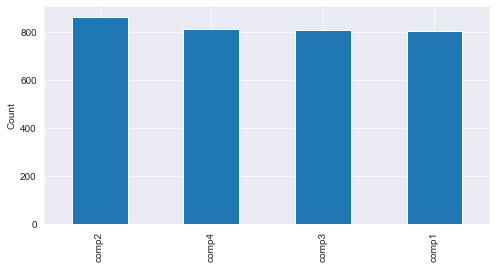

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint_df['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')

---

### Machines
Deze gegevensverzameling omvat enige informatie over de machines: modeltype en leeftijd (aantal jaren in gebruik).

In [16]:
machines_df['model'] = machines_df['model'].astype('category')

print("Totaal aantal machines: %d" % len(machines_df.index))
machines_df.head()

Totaal aantal machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


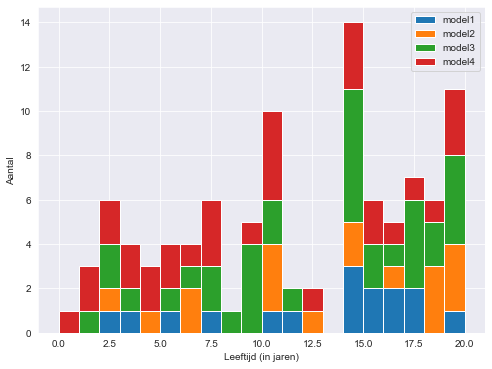

In [17]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines_df.loc[machines_df['model'] == 'model1', 'age'],
                       machines_df.loc[machines_df['model'] == 'model2', 'age'],
                       machines_df.loc[machines_df['model'] == 'model3', 'age'],
                       machines_df.loc[machines_df['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Leeftijd (in jaren)')
plt.ylabel('Aantal')
plt.legend()

### Failures
Dit zijn de records van de vervangingen van onderdelen wegens defecten. Elk record heeft een datum en tijd, machine-ID, en defect componenttype.

In [18]:
# Omzetten van datetime tabel (welke in string formaat aangeleverd wordt in de originele dataset)
failures_df['datetime'] = pd.to_datetime(failures_df['datetime'], format="%Y-%m-%d %H:%M:%S")
failures_df['failure'] = failures_df['failure'].astype('category')

print("Totaak aantal failures: %d" % len(failures_df.index))
failures_df.head()

Totaak aantal failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


Hieronder is het histogram van de defecten per onderdeel te zien. We zien dat de meeste defecten te wijten zijn aan component 2.

Text(0, 0.5, 'Aantal')

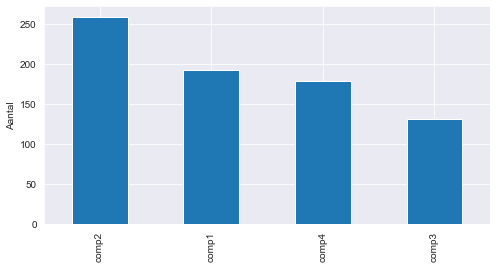

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
failures_df['failure'].value_counts().plot(kind='bar')
plt.ylabel('Aantal')

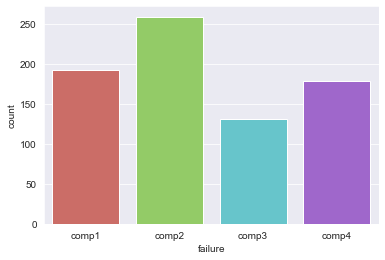

In [20]:
# Alternatieve code
sns.countplot(x= 'failure', data=failures_df, palette='hls')
plt.show()

---

### Failures afzetten tegen tijd

In [21]:
df=failures_df
df['datetime'] = pd.to_datetime(df['datetime']) 
# Maakt een nieuwe kolom aan (maand)
df['Month'] = df['datetime'].dt.month 
# Maakt een nieuwe kolom aan genaamd (week)
df["Week"] = df['datetime'].dt.dayofweek 
# Maakt een nieuwe kolom aan (dag)
df['Day'] = df['datetime'].dt.day 
# Maakt een nieuwe kolom aan (uur)    
df['Hour'] = df['datetime'].dt.hour   

df = df.drop(['datetime'], axis=1) 

In [22]:
df["failure"],class_name_model=pd.factorize(df["failure"])

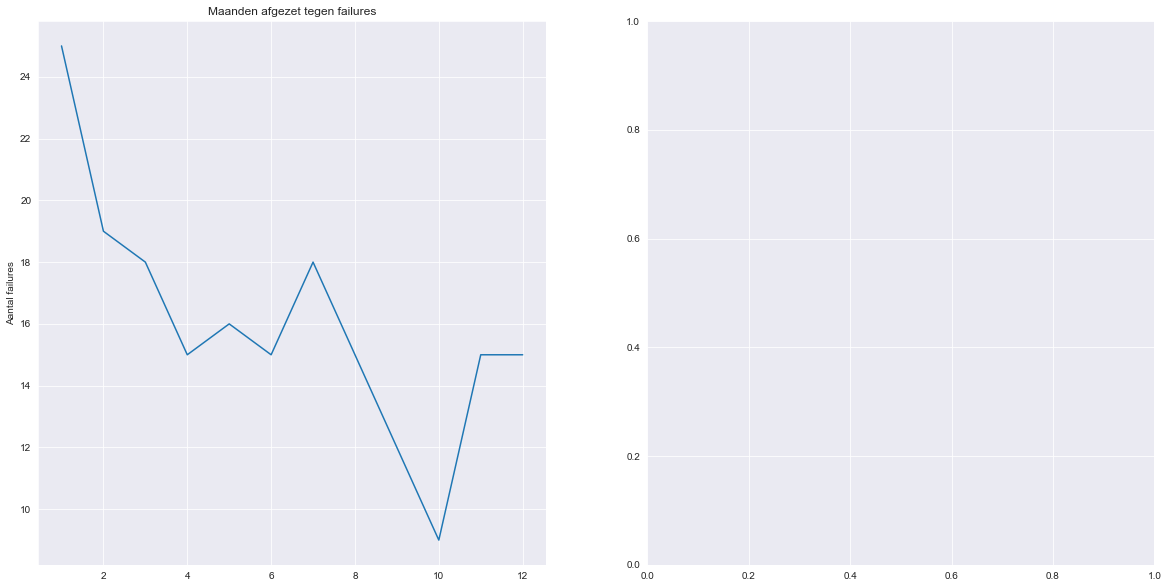

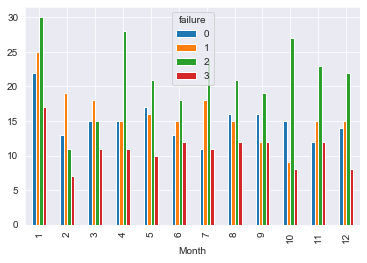

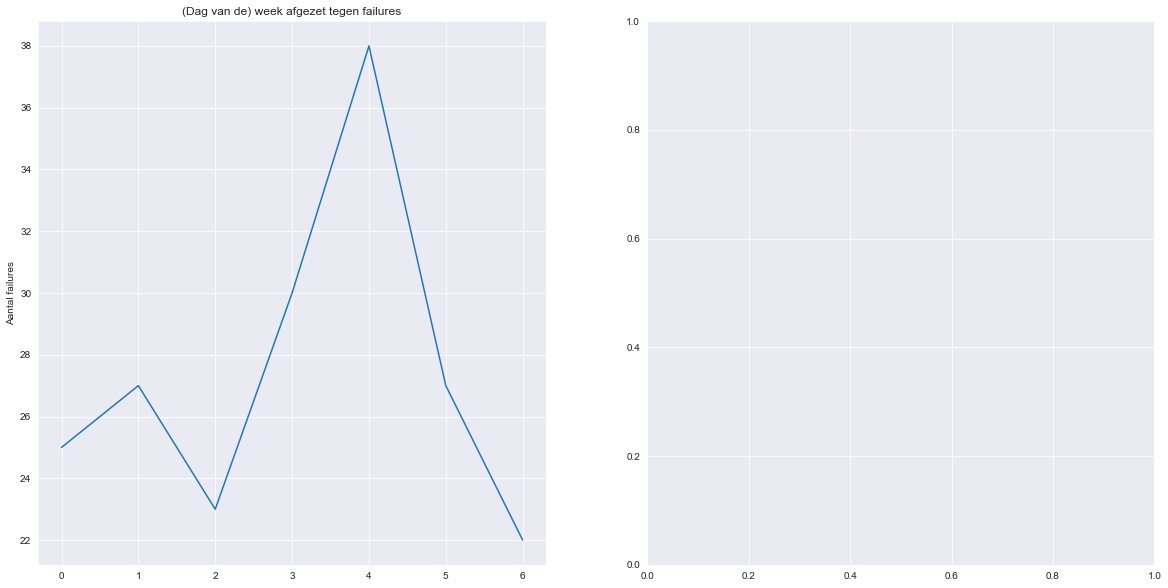

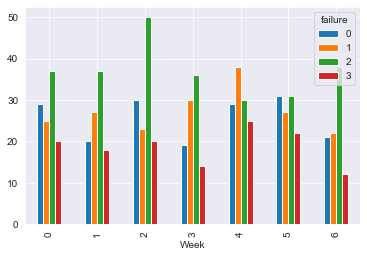

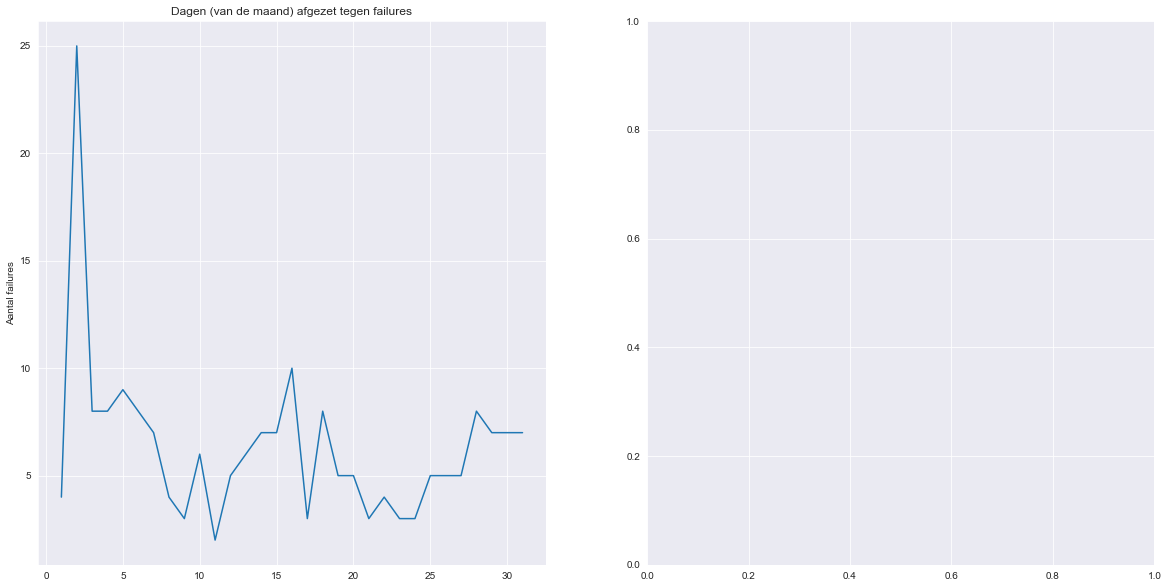

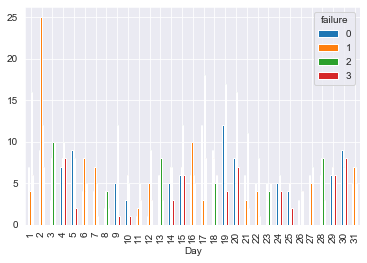

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df['Month'][df["failure"]==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('Maanden afgezet tegen failures')
ax[0].set_ylabel('Aantal failures')
pd.crosstab(df["failure"], df["Month"]).T.plot.bar()
plt.show()

f,ax=plt.subplots(1,2,figsize=(20,10))
df['Week'][df["failure"]==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('(Dag van de) week afgezet tegen failures')
ax[0].set_ylabel('Aantal failures')
pd.crosstab(df["failure"], df['Week']).T.plot.bar()
plt.show()

f,ax=plt.subplots(1,2,figsize=(20,10))
df['Day'][df["failure"]==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('Dagen (van de maand) afgezet tegen failures')
ax[0].set_ylabel('Aantal failures')
pd.crosstab(df["failure"], df["Day"]).T.plot.bar()
plt.show()

---

### Errors afzetten tegen tijd

In [24]:
df1=errors_df
df1['datetime'] = pd.to_datetime(df1['datetime']) 
# Maakt een nieuwe kolom aan (maand)
df1['Month'] = df1['datetime'].dt.month 
# Maakt een nieuwe kolom aan genaamd (week)
df1["Week"] = df1['datetime'].dt.dayofweek 
# Maakt een nieuwe kolom aan (dag)
df1['Day'] = df1['datetime'].dt.day 
# Maakt een nieuwe kolom aan (uur)    
df1['Hour'] = df1['datetime'].dt.hour   

df1 = df1.drop(['datetime'], axis=1)    

In [25]:
df1["errorID"],class_name_model=pd.factorize(df1["errorID"])

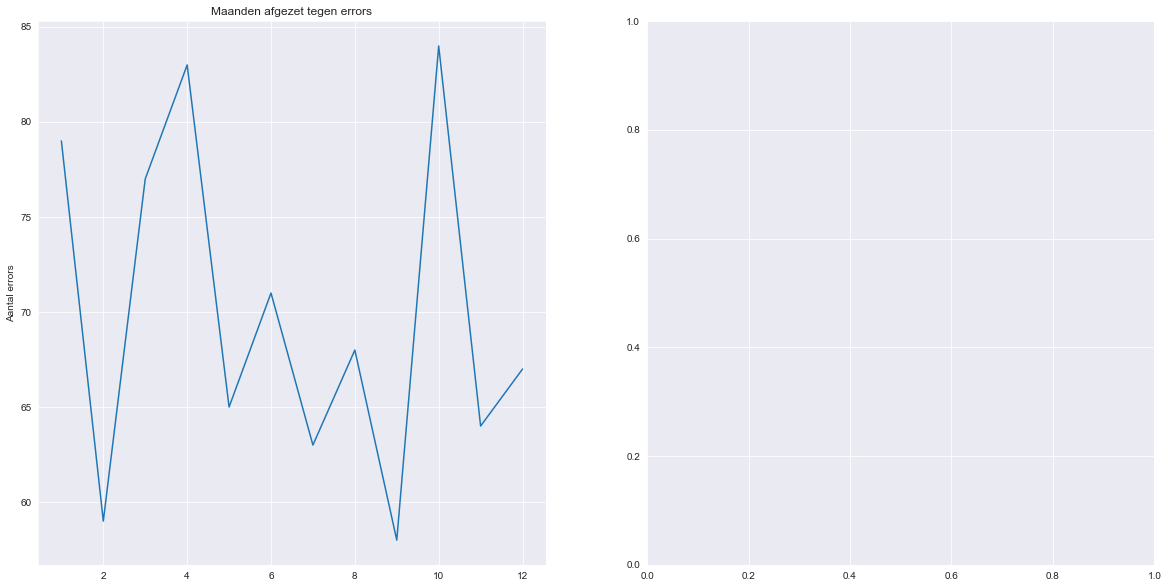

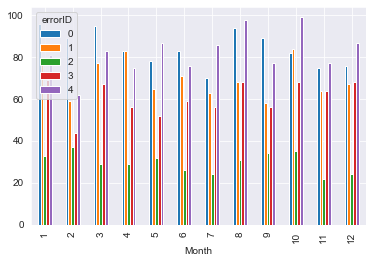

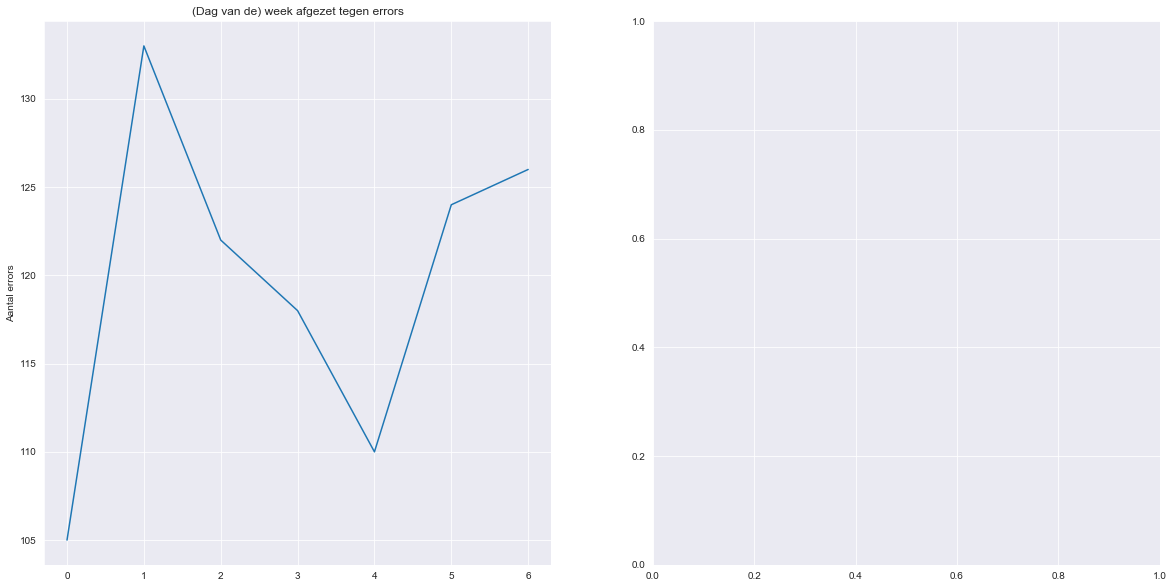

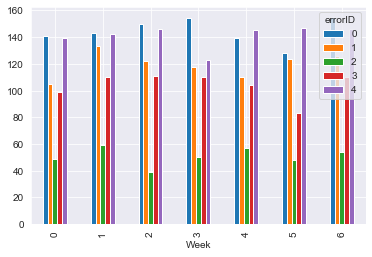

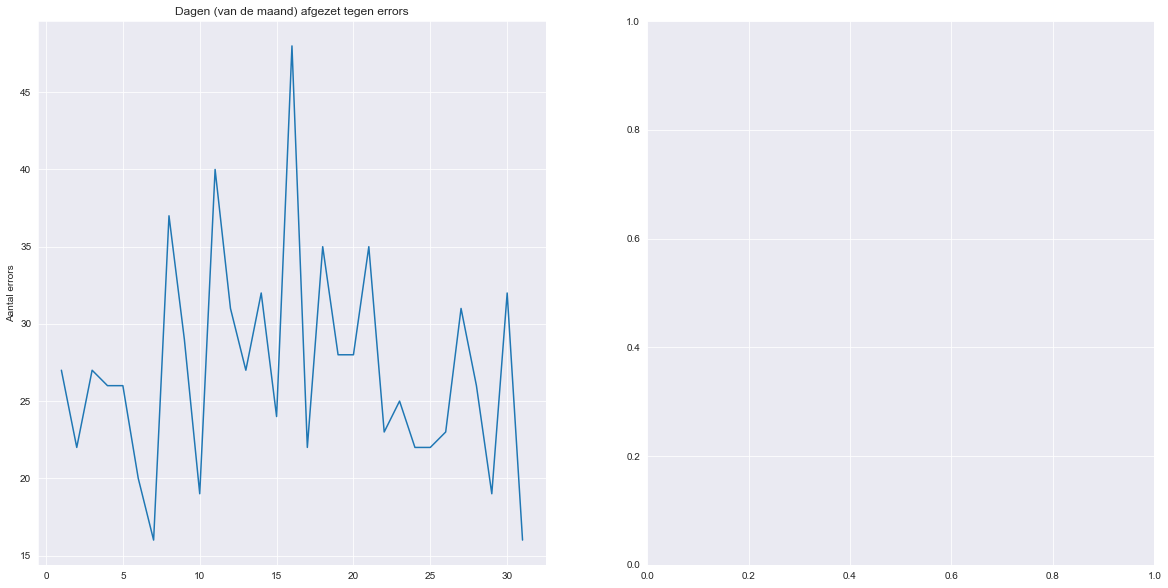

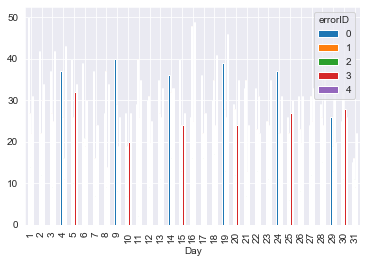

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df1['Month'][df1["errorID"]==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('Maanden afgezet tegen errors')
ax[0].set_ylabel('Aantal errors')
pd.crosstab(df1["errorID"], df1["Month"]).T.plot.bar()
plt.show()

f,ax=plt.subplots(1,2,figsize=(20,10))
df1['Week'][df1["errorID"]==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('(Dag van de) week afgezet tegen errors')
ax[0].set_ylabel('Aantal errors')
pd.crosstab(df1["errorID"], df1['Week']).T.plot.bar()
plt.show()

f,ax=plt.subplots(1,2,figsize=(20,10))
df1['Day'][df1["errorID"]==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('Dagen (van de maand) afgezet tegen errors')
ax[0].set_ylabel('Aantal errors')
pd.crosstab(df1["errorID"], df1['Day']).T.plot.bar()
plt.show()

---

In [27]:
def plot_boxh_groupby(df, feature_name, by):
    df.boxplot(column=feature_name, by=by, vert=False, figsize=(10, 6))
    plt.title(f'Distribution of {feature_name} by {by}')
plt.show()

plot_boxh_groupby(telemetry_df, feature_name="volt", by="month_year")

IndentationError: expected an indented block (<ipython-input-27-8371139e08e1>, line 2)